In [1]:
import time

import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import logging
logging.basicConfig(level=logging.INFO)  # sometimes this is required to enable logging inside Jupyter

%matplotlib inline
%precision 2

# Set an arbitrary seed and a global random state to keep the randomly generated quantities the same between runs
seed = 20170530  # this will be separately given to ELFI
np.random.seed(seed)

In [2]:
import elfi

In [3]:
mu = elfi.Prior('uniform', -10, 20)

In [4]:
import scipy.stats as ss
import numpy as np

In [5]:
def NormalSimulator(mu, n, batch_size=1, random_state=None):
    mu = np.atleast_1d(mu)
    return ss.norm.rvs(mu[:, None], 1, size=(batch_size, n), random_state=random_state)

In [6]:
def mean(y):
    return np.mean(y, axis=1)

In [8]:
mean0 = 4
n0 = 100

# Generate some data (using a fixed seed here)
np.random.seed(20170525)
y0 = NormalSimulator(mean0,n0)
print(y0)

import csv

with open('normal_data.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(y0)

csvFile.close()

[[4.93 4.16 3.97 4.49 3.63 3.93 3.91 1.98 3.96 4.85 3.82 2.56 3.48 4.67
  4.2  2.54 5.35 2.76 5.7  5.36 4.3  3.09 4.96 3.83 4.22 2.83 3.39 4.56
  4.59 1.66 3.65 3.43 3.6  3.92 4.84 3.96 4.4  4.46 3.89 4.51 4.59 2.93
  3.14 3.49 5.63 3.36 3.32 4.76 4.84 3.75 3.   4.56 2.42 5.01 3.37 5.32
  4.33 4.12 3.83 5.48 2.96 4.88 2.18 4.11 2.69 4.84 3.13 2.93 4.72 3.43
  2.86 3.86 3.61 3.88 2.92 2.45 3.56 3.76 2.28 5.67 3.93 4.36 4.77 2.35
  2.91 3.63 3.9  3.98 3.16 2.3  4.41 4.21 4.49 3.58 4.56 4.38 3.53 3.51
  3.92 4.91]]


In [9]:
# Add the simulator node and observed data to the model
sim = elfi.Simulator(NormalSimulator, mu, n0, observed=y0)

In [10]:
# Add summary statistics to the model
S1 = elfi.Summary(mean, sim)

In [11]:
# Specify distance as euclidean between summary vectors (S1) from simulated and
# observed data
d = elfi.Distance('euclidean', S1)

In [12]:
rej = elfi.Rejection(d, batch_size=10000, seed=30052017)

In [13]:
res = rej.sample(1000, threshold=.5)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [14]:
print(res)

Method: Rejection
Number of samples: 1000
Number of simulations: 30000
Threshold: 0.337
Sample means: mu: 3.87



In [15]:
import matplotlib.pyplot as plt

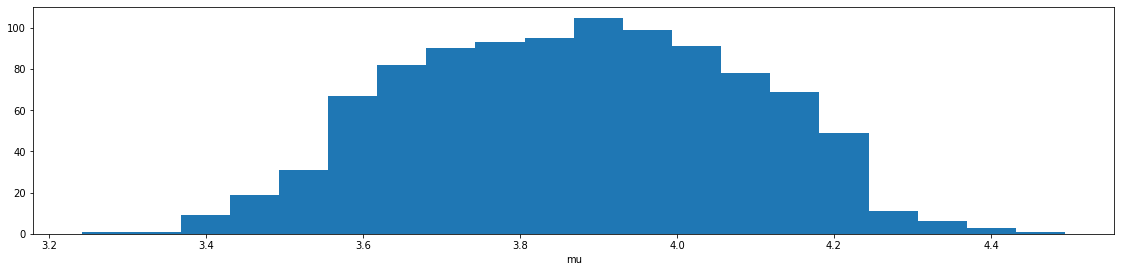

In [16]:
res.plot_marginals()
plt.show()

In [17]:
type(res)

elfi.methods.results.Sample

In [20]:
dir(res)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'accept_rate',
 'dim',
 'discrepancies',
 'discrepancy_name',
 'is_multivariate',
 'meta',
 'method_name',
 'n_batches',
 'n_samples',
 'n_sim',
 'outputs',
 'parameter_names',
 'plot_marginals',
 'plot_pairs',
 'sample_means',
 'sample_means_array',
 'sample_means_summary',
 'samples',
 'samples_array',
 'save',
 'seed',
 'summary',
 'threshold',
 'weights']

In [21]:
print(res.sample_means)

OrderedDict([('mu', 3.923855417146688)])


In [22]:
print(res.sample_means_array)

[3.92]


In [23]:
print(res.samples)

OrderedDict([('mu', array([4.05, 3.79, 3.62, 3.59, 3.93, 4.02, 4.33, 3.69, 3.99, 3.63, 4.21,
       3.6 , 3.7 , 4.12, 3.55, 3.9 , 3.98, 3.76, 3.96, 3.91, 3.96, 3.95,
       3.81, 4.21, 3.99, 4.16, 3.56, 3.89, 3.94, 3.81, 3.7 , 4.28, 3.87,
       4.07, 3.73, 3.72, 3.92, 3.81, 3.88, 3.78, 4.02, 3.86, 3.67, 3.74,
       3.89, 3.95, 4.04, 3.97, 3.8 , 4.12, 4.08, 3.73, 3.64, 3.92, 3.9 ,
       3.89, 3.99, 3.8 , 3.92, 3.88, 3.68, 3.97, 3.8 , 3.98, 4.24, 3.76,
       3.74, 3.53, 4.24, 3.94, 3.85, 4.11, 3.77, 3.9 , 3.71, 3.9 , 4.26,
       4.02, 4.11, 3.64, 3.83, 4.21, 3.81, 3.79, 4.19, 3.49, 4.02, 4.1 ,
       4.1 , 3.62, 3.89, 3.98, 3.87, 3.64, 3.98, 3.63, 3.71, 3.98, 3.91,
       3.99, 4.01, 4.04, 3.67, 3.91, 4.07, 4.16, 3.83, 3.9 , 3.56, 4.05,
       3.73, 3.78, 3.93, 4.14, 3.67, 3.93, 4.12, 4.31, 4.09, 3.97, 4.13,
       4.23, 4.24, 4.22, 3.93, 4.16, 3.98, 3.79, 3.64, 4.  , 4.12, 4.08,
       3.88, 3.96, 4.34, 4.04, 3.77, 3.83, 4.13, 4.11, 3.72, 4.07, 4.11,
       4.27, 3.83, 4.25, 4.  , 

In [24]:
print(res.samples_array)

[[4.05]
 [3.79]
 [3.62]
 [3.59]
 [3.93]
 [4.02]
 [4.33]
 [3.69]
 [3.99]
 [3.63]
 [4.21]
 [3.6 ]
 [3.7 ]
 [4.12]
 [3.55]
 [3.9 ]
 [3.98]
 [3.76]
 [3.96]
 [3.91]
 [3.96]
 [3.95]
 [3.81]
 [4.21]
 [3.99]
 [4.16]
 [3.56]
 [3.89]
 [3.94]
 [3.81]
 [3.7 ]
 [4.28]
 [3.87]
 [4.07]
 [3.73]
 [3.72]
 [3.92]
 [3.81]
 [3.88]
 [3.78]
 [4.02]
 [3.86]
 [3.67]
 [3.74]
 [3.89]
 [3.95]
 [4.04]
 [3.97]
 [3.8 ]
 [4.12]
 [4.08]
 [3.73]
 [3.64]
 [3.92]
 [3.9 ]
 [3.89]
 [3.99]
 [3.8 ]
 [3.92]
 [3.88]
 [3.68]
 [3.97]
 [3.8 ]
 [3.98]
 [4.24]
 [3.76]
 [3.74]
 [3.53]
 [4.24]
 [3.94]
 [3.85]
 [4.11]
 [3.77]
 [3.9 ]
 [3.71]
 [3.9 ]
 [4.26]
 [4.02]
 [4.11]
 [3.64]
 [3.83]
 [4.21]
 [3.81]
 [3.79]
 [4.19]
 [3.49]
 [4.02]
 [4.1 ]
 [4.1 ]
 [3.62]
 [3.89]
 [3.98]
 [3.87]
 [3.64]
 [3.98]
 [3.63]
 [3.71]
 [3.98]
 [3.91]
 [3.99]
 [4.01]
 [4.04]
 [3.67]
 [3.91]
 [4.07]
 [4.16]
 [3.83]
 [3.9 ]
 [3.56]
 [4.05]
 [3.73]
 [3.78]
 [3.93]
 [4.14]
 [3.67]
 [3.93]
 [4.12]
 [4.31]
 [4.09]
 [3.97]
 [4.13]
 [4.23]
 [4.24]
 [4.22]
 [3.93]


In [25]:
import csv

In [18]:
with open('normal_standardABC.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(res.samples_array)

csvFile.close()

In [19]:
log_d = elfi.Operation(np.log, d)

In [20]:
bolfi = elfi.BOLFI(log_d, batch_size=1, initial_evidence=20, update_interval=10,
                   bounds={'mu':(-20, 20)}, acq_noise_var=[0.1, 0.1], seed=seed)

In [21]:
%time post = bolfi.fit(n_evidence=200)

INFO:elfi.methods.parameter_inference:BOLFI: Fitting the surrogate model...


Progress: |██████████████████████████████████████████████████| 100.0% Complete


INFO:elfi.methods.posteriors:Using optimized minimum value (-2.5393) of the GP discrepancy mean function as a threshold


CPU times: user 1min 39s, sys: 14.9 s, total: 1min 54s
Wall time: 59.2 s


In [22]:
bolfi.target_model


Name : GP regression
Objective : 276.8069242038549
Number of Parameters : 4
Number of Optimization Parameters : 4
Updates : True
Parameters:
  GP_regression.           |               value  |  constraints  |     priors   
  sum.rbf.variance         |  0.9577181655412834  |      +ve      |  Ga(0.26, 1) 
  sum.rbf.lengthscale      |  0.4712798993528661  |      +ve      |   Ga(6.7, 1) 
  sum.bias.variance        |  0.5982321319260925  |      +ve      |  Ga(0.065, 1)
  Gaussian_noise.variance  |  0.5801742400713152  |      +ve      |              

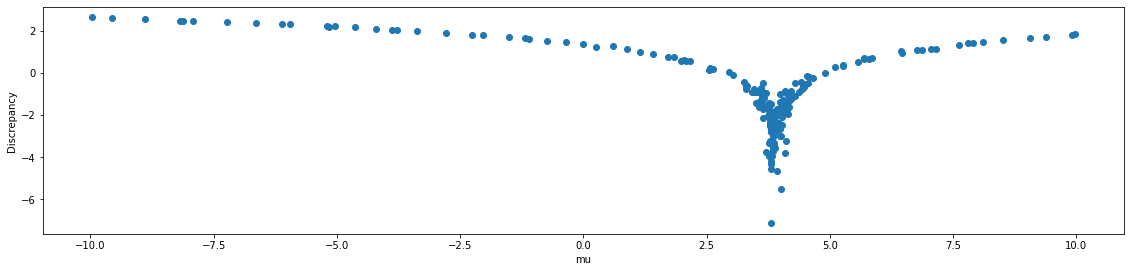

In [23]:
bolfi.plot_discrepancy();

In [24]:
post2 = bolfi.extract_posterior(-1.)

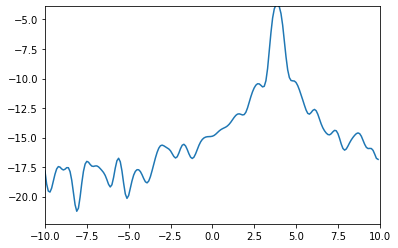

In [25]:
post.plot(logpdf=True)

In [26]:
%time result_BOLFI = bolfi.sample(1000, info_freq=1000)

INFO:elfi.methods.posteriors:Using optimized minimum value (-2.5393) of the GP discrepancy mean function as a threshold
INFO:elfi.methods.mcmc:NUTS: Performing 1000 iterations with 500 adaptation steps.
INFO:elfi.methods.mcmc:NUTS: Adaptation/warmup finished. Sampling...
INFO:elfi.methods.mcmc:NUTS: Acceptance ratio: 0.608. After warmup 6 proposals were outside of the region allowed by priors and rejected, decreasing acceptance ratio.
INFO:elfi.methods.mcmc:NUTS: Performing 1000 iterations with 500 adaptation steps.
INFO:elfi.methods.mcmc:NUTS: Adaptation/warmup finished. Sampling...
INFO:elfi.methods.mcmc:NUTS: Acceptance ratio: 0.560. After warmup 2 proposals were outside of the region allowed by priors and rejected, decreasing acceptance ratio.
INFO:elfi.methods.mcmc:NUTS: Performing 1000 iterations with 500 adaptation steps.
INFO:elfi.methods.mcmc:NUTS: Adaptation/warmup finished. Sampling...
INFO:elfi.methods.mcmc:NUTS: Acceptance ratio: 0.602. After warmup 3 proposals were outsid

4 chains of 1000 iterations acquired. Effective sample size and Rhat for each parameter:
mu 1790.3351328946783 1.0008458306675097
CPU times: user 1min 35s, sys: 12.1 s, total: 1min 47s
Wall time: 54.2 s


In [27]:
result_BOLFI

Method: BOLFI
Number of samples: 2000
Number of simulations: 200
Threshold: -2.54
Sample means: mu: 3.87

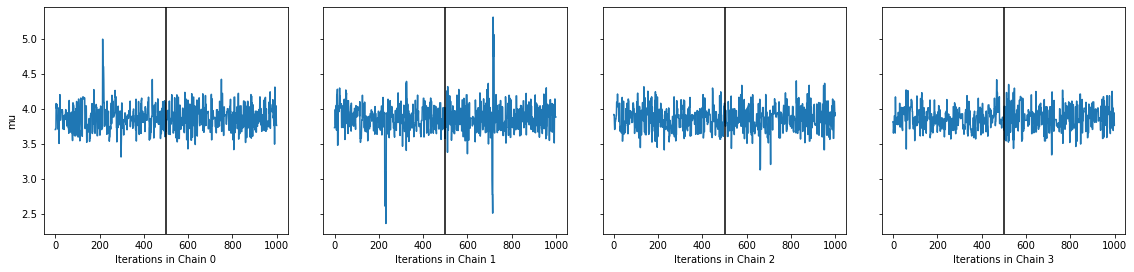

In [28]:
result_BOLFI.plot_traces();

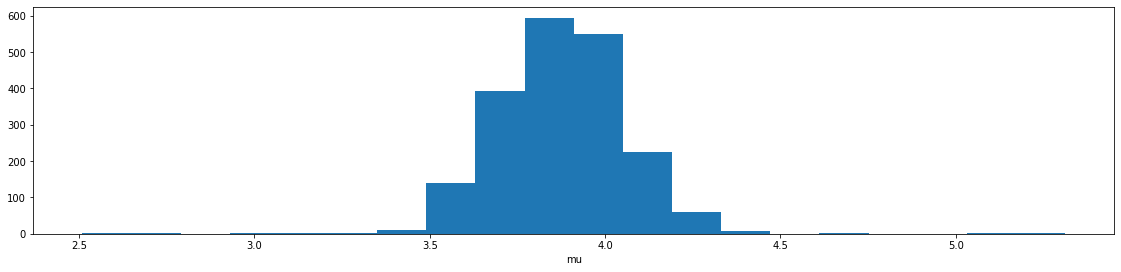

In [29]:
result_BOLFI.plot_marginals();

In [41]:
dir(result_BOLFI)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'chains',
 'dim',
 'discrepancies',
 'discrepancy_name',
 'is_multivariate',
 'meta',
 'method_name',
 'n_chains',
 'n_samples',
 'n_sim',
 'outputs',
 'parameter_names',
 'plot_marginals',
 'plot_pairs',
 'plot_traces',
 'sample_means',
 'sample_means_array',
 'sample_means_summary',
 'samples',
 'samples_array',
 'save',
 'seed',
 'summary',
 'threshold',
 'warmup',
 'weights']

In [42]:
print(result_BOLFI.samples_array)

[[4.3 ]
 [3.59]
 [3.59]
 ...
 [3.67]
 [4.32]
 [3.72]]


In [30]:
with open('normal_BOLFI.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(result_BOLFI.samples_array)

csvFile.close()